In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Creating synthetic dataset
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1, n_redundant=0)

In [6]:
X

array([[ 1.19539902, -0.39800947],
       [ 1.10564998, -0.73623285],
       [-0.70844394, -0.41135651],
       ...,
       [ 0.16123281, -1.21041825],
       [ 0.58659794, -1.59004779],
       [ 1.81008073, -0.90330242]])

In [7]:
y

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [8]:
pd.DataFrame(X)[0]

0      1.195399
1      1.105650
2     -0.708444
3     -0.971741
4     -0.398436
         ...   
995    1.376925
996   -0.643180
997    0.161233
998    0.586598
999    1.810081
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

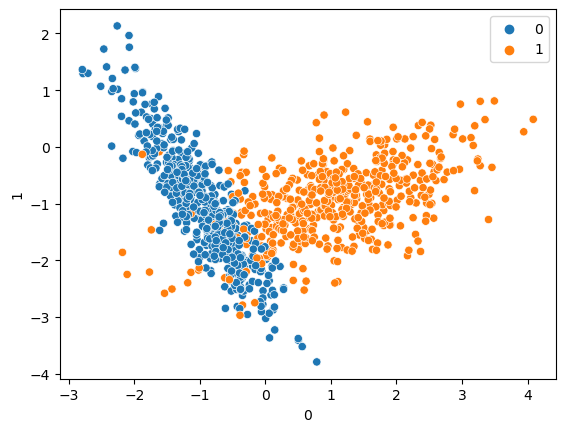

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.svm import SVC

In [16]:
svc=SVC(kernel='linear')

In [17]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [18]:
y_pred=svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       126
           1       0.92      0.99      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[115  11]
 [  1 123]]


In [21]:
svc2=SVC(kernel='rbf')

In [22]:
svc2.fit(X_train,y_train)

SVC()

In [23]:
y_pred=svc2.predict(X_test)

In [24]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       128
           1       0.91      1.00      0.95       122

    accuracy                           0.95       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250

[[116  12]
 [  0 122]]


In [25]:
polynomialsvc=SVC(kernel='poly')
polynomialsvc.fit(X_train,y_train)
y_pred=polynomialsvc.predict(X_test)

In [26]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       126
           1       0.91      0.98      0.95       124

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250

[[114  12]
 [  2 122]]


## Hyperparamter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}

In [29]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=2)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [31]:
y_pred=grid.predict(X_test)

In [32]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       121
           1       0.95      0.98      0.97       129

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[114   7]
 [  2 127]]
